# KI 2 - Hausaufgabenblatt 2 - Aufgabe 2
_Max Hilsdorf_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

E:\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
E:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 1. Definieren der Objekte

In [2]:
class Hypothesis:
    
    def __init__(self, h_prob:float, pos_prob:float, name:str):
        self.h_prob = h_prob
        self.pos_prob = pos_prob
        self.neg_prob = 1-pos_prob
        self.name = name
    
    def __repr__(self):
        return f"H({self.h_prob}, {self.pos_prob})"
    
    def __str__(self):
        return f"H({self.h_prob}, {self.pos_prob})"
        
class Draw:
    
    def __init__(self, draw:list):
        self.draw = draw
        
        
    def get_cond_probs(self, h:Hypothesis):
        """ Computes P(d | h)"""
        
        mapper = lambda x: h.pos_prob if x == 1 else h.neg_prob
        
        return np.prod([mapper(x) for x in self.draw])
    
    
    def get_hypothesis_probs(self, hypotheses:list):
        """ Computes P(h_i | d)"""
        
        unnormed_probs = []
        for h in hypotheses:
            unnormed_probs.append(self.get_cond_probs(h) * h.h_prob)

        return np.array(unnormed_probs) / sum(unnormed_probs)
    
    
    def predict_next_draw(self, hypotheses:list, method:str):
        """ Computes P(next_is_positive | d)"""
        
        h_probs = self.get_hypothesis_probs(hypotheses)
        
        if method == "bayesian":
            return np.sum([h.pos_prob * h_probs[i] for i, h in enumerate(hypotheses)])
            
        elif method == "maximum_a_posteriori":
            return hypotheses[np.argmax(h_probs)].pos_prob
        
        elif method == "maximum_likelihood":
            h_to_use = hypotheses[np.argmax([self.get_cond_probs(h) for h in hypotheses])]
            return h_to_use.pos_prob
        
        else:
            raise NotImplemented
            
    
    def __repr__(self):
        return f"Draw({self.draw})"
    
    
    def __str__(self):
        return f"Draw({self.draw})"    

## 2. Durchführen der Simulation mit 1-10 Zügen

In [3]:
# Define hypotheses
#h1 = Hypothesis(0.1, 0, "h1")
h2 = Hypothesis(0.2, 0.25, "h2")
h3 = Hypothesis(0.4, 0.5, "h3")
#h4 = Hypothesis(0.2, 0.75, "h4")
#h5 = Hypothesis(0.1, 1, "h5")

hypotheses = [h2,h3]

# Draw 1-10 saueramper
draws = [Draw([1 for i in range(k)]) for k in range(1,11)]

In [4]:
hypotheses

[H(0.2, 0.25), H(0.4, 0.5)]

In [5]:
h_probs = np.array([d.get_hypothesis_probs(hypotheses) for d in draws])
h_probs

array([[2.00000000e-01, 8.00000000e-01],
       [1.11111111e-01, 8.88888889e-01],
       [5.88235294e-02, 9.41176471e-01],
       [3.03030303e-02, 9.69696970e-01],
       [1.53846154e-02, 9.84615385e-01],
       [7.75193798e-03, 9.92248062e-01],
       [3.89105058e-03, 9.96108949e-01],
       [1.94931774e-03, 9.98050682e-01],
       [9.75609756e-04, 9.99024390e-01],
       [4.88042948e-04, 9.99511957e-01]])

## 3. Wahrscheinlichkeit der Hypothesen

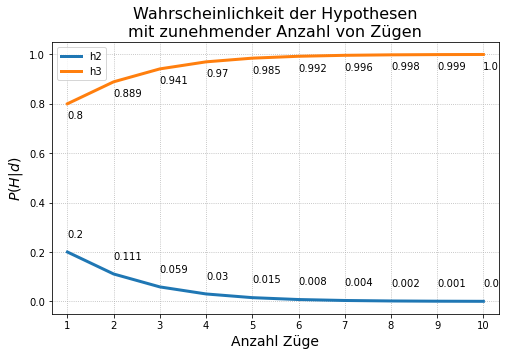

In [6]:
fig, ax = plt.subplots(figsize=(8,5))

colors = ["seagreen", "steelblue"]
markers = ["p", "d"]
x_idx = [x+1 for x in range(h_probs.shape[0])]

# Plot
#for i in range(len(hypotheses)):
#    ax.plot(x_idx, h_probs[:,i], c=colors[i], linewidth=3, label=hypotheses[i].name, marker=markers[i])
    
for i in range(len(hypotheses)):
    ax.plot(x_idx, h_probs[:,i], linewidth=3, label=hypotheses[i].name)

# Axes
ax.set_xticks(x_idx)
ax.set_xlim(x_idx[0]-0.33, x_idx[-1]+0.33)
ax.set_ylim(-.05,1.05)

# Labels
ax.set_ylabel("$P(H|d)$", size=14)
ax.set_xlabel("Anzahl Züge", size=14)
ax.set_title("Wahrscheinlichkeit der Hypothesen\nmit zunehmender Anzahl von Zügen", size=16)
ax.legend()

for i in range(2):
    for j in range(1,len(h_probs)+1):
        ax.text(j, h_probs[j-1,i]-0.12*i+0.06, str(round(h_probs[j-1,i],3)))

# Other
ax.grid(linestyle=":")

plt.show()

Bereits beim ersten Zug ist Hypothese 3 deutlich wahrscheinlicher als Hypothese 2. Diese Sicherheit nimmt weiter zuund nach 10 Zügen wertet $P(h3|d)$ bereits, auf die dritte Nachkommastelle gerundet, zu 1 aus. Es ist wenig überraschend, dass die Hypothese gewählt wird, die die höhere Wahrscheinlichkeit für das Ziehen von Sauerampfer aufweist.

## 4. Vorhersage des nächsten Zuges

In [7]:
methods = ["bayesian", "maximum_a_posteriori", "maximum_likelihood"]
next_probs = np.zeros((len(methods), len(draws)))

for i, method in enumerate(methods):
    for j, d in enumerate(draws):
        next_probs[i,j] = d.predict_next_draw(hypotheses, method)
        
next_probs

array([[0.45      , 0.47222222, 0.48529412, 0.49242424, 0.49615385,
        0.49806202, 0.49902724, 0.49951267, 0.4997561 , 0.49987799],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ]])

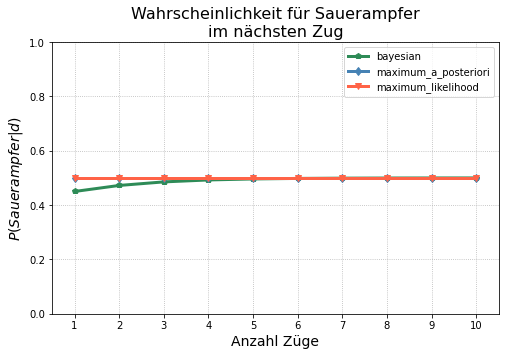

In [8]:
fig, ax = plt.subplots(figsize=(8,5))

colors = ["seagreen", "steelblue", "tomato"]
markers = ["p", "d", "v"]

x_idx = [x+1 for x in range(h_probs.shape[0])]

# Plot
for i, method in enumerate(methods):
    ax.plot(x_idx, next_probs[i], label=method, c=colors[i], marker=markers[i], linewidth=3)

# Axes
ax.set_xlim(1-0.5,10.5)
ax.set_xticks(x_idx)
ax.set_ylim(0,1)

# Labels
ax.set_ylabel("$P(Sauerampfer|d)$", size=14)
ax.set_xlabel("Anzahl Züge", size=14)
ax.set_title("Wahrscheinlichkeit für Sauerampfer\nim nächsten Zug", size=16)


# Other
ax.legend()
ax.grid(linestyle=":")

plt.show()

Deutlich kann der Abbildung die Eigenschaft der Maximum-Likelihood und Maximum-a-Posteriori Verfahren, keine graduellen Anpassungen zu machen, entnommen werden. Sowohl die Maximum-Likelihood- als auch die Maximum-a-Posteriori Methode liefern eine Konstante über alle Züge hinweg. Das liegt daran, dass $P(d|h_i)$ sowie $P(h_i|d)$ konstant bleiben. In diesem Fall liefern die beiden Methoden sogar identische Ergebnisse, da sie sich beide an der Sauerampfer-WK von $h3$ orientieren. Der bayessche Ansatz konvergiert mit der Anzahl der Züge gegen $h3$. Dies spricht dafür, dass Das Maximum-Likelihood Verfahren hier genauere Ergebnisse liefert. Das Maximum-A-Posteriori Verfahren spart sich zwar einen Rechenschritt, aber würde zu der Vorhersage führen, dass __kein__ Sauerampfer als nächstes gezogen wird. Die anderen beiden Ansätze tendieren zu einem $50/50$.